# Tests

## Basic tests

### Utilisation of classes

In [2]:
from class_Path import *
file_path = "./ged docs/Queen_Eliz_II.ged"

In [3]:
graph = Graph(file_path)
path = Path(file_path)

In [4]:
path.print('@I11259@','@I10835@')

'Isabella (le) is the son of the grand son of Thomas, who is the grand son of the grand son of the grand son of Dorothy, who is the wife of the grand mother of the grand father of Henry (4th Lord of Groby) de, who is the grand father of the grand mother of the grand mother of Eva, who is the grand mother of the niece of Thomas'

## Parameters tests

### Data series creation

In [12]:
import random
import time
import matplotlib.pyplot as plt
from class_Path import *

In [13]:
file_path = "./ged docs/Queen_Eliz_II.ged"
graph = Graph(file_path).print()
path = Path(file_path)

In [4]:
def random_serie() :
    keys = list(graph.keys())
    serie = []
    j = 0
    while j < 10 :
        i = random.randint(0,len(keys)-1)
        serie += [keys[i]]
        j += 1
    return serie

In [5]:
serie = []
serie1,serie2 = random_serie(), random_serie()
for i in range(len(serie1)) :
    serie += [[serie1[i],serie2[i]]]


distances = []
paths = []
path_times = []
for i in range(len(serie)) : 
    start = time.time()
    shortest_path = path.get(serie[i][0],serie[i][1])
    distances += [shortest_path[0]]
    paths += [shortest_path[1]]
    end = time.time()
    path_times += [end-start]


df = pd.DataFrame(
{
    'Individuals' : serie,
    'Path' : paths,
    'Distance' : distances,
    'Execution time (s)' : path_times
})
df.set_index('Individuals',inplace=True)
df

,Path,Distance,Execution time (s)
Individuals,,,
"[@I9421@, @I10822@]",Gilbert (II; de) is the grand father of the ni...,18,14.521609
"[@I10084@, @I6526@]",Chief Frank Marcomir is the wife of the grand ...,48,35.771637
"[@I10182@, @I5303@]",EMMELINE is the grand son of the grand son of ...,41,31.016189
"[@I8934@, @I6261@]",Sebekshedty-Neferu (Queen) of EGYPT is the hus...,194,130.569275
"[@I10068@, @I955@]",Regina is the grand daughter of the husband of...,40,30.043208
"[@I2189@, @I899@]",Constance is the daughter of the husband of El...,17,15.038925
"[@I5277@, @I10351@]",Ieaun ap (Lord of BAGLAN) is the wife of the ...,22,19.079764
"[@I5609@, @I6611@]",Bresal Brecc mac Criomthann Crosach I is the g...,81,52.728971
"[@I10659@, @I9283@]",Ferither Our 'Dun is the grand daughter of the...,49,36.812857


In [29]:
average = sum(path_times)/len(path_times)
average

39.03886377811432

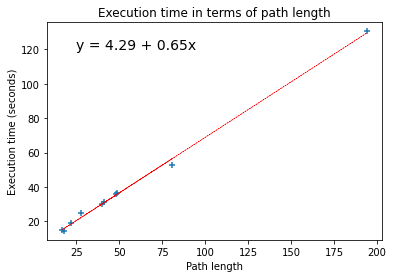

In [39]:
a,b = np.polyfit(distances,path_times,1)
plt.scatter(distances,path_times,marker='+')
plt.plot(distances,a * np.array(distances) + b, color='r', linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.xlabel('Path length')
plt.ylabel('Execution time (seconds)')
plt.title("Execution time in terms of path length")
plt.text(25, 120, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.show()

### Test class use

In [1]:
from class_Test import *

In [2]:
# /!\ Very long : takes up to 15 minutes /!\
test = Test("./ged docs/Queen_Eliz_II.ged")

In [3]:
test.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference in execution time
Individuals,,,,,,
"[@I4795@, @I6032@]",Cadrod (Calchwynydd) ap ENIR FARDD is the gran...,29,29,21.164475,21.656054,-0.491579
"[@I6144@, @I11170@]",Sir John Foremark BARON OF DERBYSHIRE AND OF C...,103,103,74.284399,70.439031,3.845368
"[@I6264@, @I8863@]",Thomas de is the grand son of the grand son of...,192,192,127.167431,127.958004,-0.790573


In [4]:
test.average()

(74.20543495814006, 73.35102979342143)

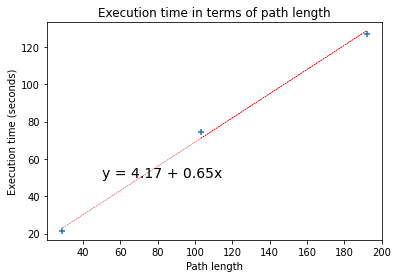

In [5]:
test.plot_Distance_Time()

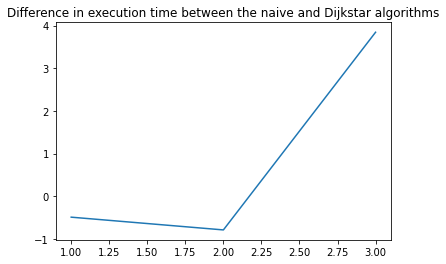

In [6]:
test.plot_difference()